# Tensor Networks Tutorials

### Reference and descriptions
- Main reference: [Tensors.net](https://www.tensors.net/)
- Documents descriptions:
  - Author: Sung-Min, Park
  - Date: Nov. 6, 2024


---

## Tutorial 1: Tensor Contractions

In [ ]:
### Initialization ###
import numpy as np  # Essential package for tensor network approaches

### Definitions
> Roughly speaking, the tensors are simply multi-dimensional array of (real or complex) numbers.
- Formally, a tensor can be written as
  $$T_{ i_{1} i_{2}\cdots i_{n} } \in \mathbb{C} \text{ or } \mathbb{R}, \quad T \in \mathbb{C}^{d_{1} \times d_{2} \times \cdots \times d_{n}}, $$
  where $1 \le i_{\alpha} \le d_{\alpha}$ with $\alpha = 1, \cdots n$.

---

### Terminologies
There are basic terminology; **order, rank, dimension**.
- **Order (or Rank)**: The order of a tensor is defined as *the number of indices it has*.
- **(Decomposition) Rank**: The rank  of a tensor with respect to *some partition* of the indices (for tensors with order $> 2$) specifies the **minimum dimension of an exact factorization** on this partition.
- **Dimension**: The size of a tensor index
  - While other terms could be called differtly depending on what context there is, this term refers the size of a tensor index almost exclusively.
  - e.g.) The dimesion of an index $i_{\alpha}$: $d_{\alpha}$.

---

#### Example
Suppose a tensor $T_{ijkl}$ with order $4$ has the following exact decomposition:
  $$T_{ijkl} = \sum_{m=1}^{r} A_{ijm} B_{mkl}. $$
  Then, we say the tensor $T$ has rank $r$.
- e.g.) The order of tensor $T$: $n$

In [ ]:
A = np.random.rand(10)    # random vector,   order 1, dim = 10
B = np.eye(5, 5)          # identity matrix, order 2, dim = 5*5
C = np.zeros((5, 4, 6))   # tensor of zeros, order 3, dim = 2*3*4
D = np.ones((2, 3, 4, 5)) # tensor of ones, order 4, dim = 2*3*4*5
E = np.random.rand(2, 3, 4) + 1j*np.random.rand(2, 3, 4) # random complex tensor, order 3, dim = 2*3*4

In [ ]:
name = ["A", "B", "C", "D", "E"]  # Tensor names
tensor_dict = dict(zip(name, [A, B, C, D, E]))

for key, item in zip(name, [A, B, C, D, E]):
  shape = np.shape(item)
  print(key+f' is a tensor with shape {shape}, whose order is {len(shape)} and dimension is {np.prod(shape)}\n')
  #print(key+f'={item}\n\n\n')

A is a tensor with shape (10,), whose order is 1 and dimension is 10

B is a tensor with shape (5, 5), whose order is 2 and dimension is 25

C is a tensor with shape (5, 4, 6), whose order is 3 and dimension is 120

D is a tensor with shape (2, 3, 4, 5), whose order is 4 and dimension is 120

E is a tensor with shape (2, 3, 4), whose order is 3 and dimension is 24



# T1.1. Diagrammatic notations
**Diagrammatic notation** is particulary convenient method to represent tensor networks. In diagrammatic notation,
- An individual tensors are represented as a solid shape with a number of *legs* that corresponds to the indices of the tensors.


![center |Fig_1_1_a.webp](https://drive.google.com/uc?export=view&id=1AhfJTa9RoGydDGouSh1ggrSubqBvBOOX)

In [ ]:
# Tensors in Figure 1.1 (a)
# Tensors with order 1, 2, 3
A = np.random.rand(10)    # random vector,   order 1, dim = 10
B = np.eye(6, 5)          # identity matrix, order 2, dim = 5*5
C = np.zeros((5, 4, 6))   # tensor of zeros, order 3, dim = 2*3*4

In [ ]:
# Tensor contraction
A = np.random.rand(3, 4)
B = np.random.rand(4, 5)
C = np.random.rand(5, 3)

# **T1.2. Permute and reshape operations**

Fundamental to the manipulation of tensors are the 'permute' and ‘reshape’ functions.
## **Permute**:
  - Changing the index ordering of a tensor, but it does not change the number of indices.

## **Reshape**
  - a collection of tensor indices to be combined into a single larger index (or vice-versa).
  - thus can change the number of indices but not the total dimension.

In equations, we sometimes bracket subscript indices to denote the combining of indices,
$$ \tilde{B}_{i_{1},j_{2}} = B_{i_{1}, (i_{2} i_{3})}, $$
while diagrammatically this may be indicated by drawing two tensor indices coming together to form a single index.
Often tensor indices of larger dimension are depicted by thicker lines!

### **Permute example**

In [ ]:
## Permutation
A_ijk = np.arange(3**3).reshape(3, 3, 3)

## Permutation using "np.transpose"
A_ikj = A_ijk.transpose(0, 2, 1)
A_kij = A_ijk.transpose(2, 0, 1)
A_kji = A_ijk.transpose(2, 1, 0)

## Check
i, j, k = 0, 1, 2

print(f'A_ijk = {A_ijk[i, j, k]}')
print(f'A_ikj = {A_ikj[i, k, j]}')
print(f'A_kij = {A_kij[k, i, j]}')
print(f'A_kji = {A_kji[k, j, i]}')

A_ijk = 5
A_ikj = 5
A_kij = 5
A_kji = 5


In [ ]:
# print(f'Tensor A_ijk: \n{A_ijk}')
# print(f'Tensor A_ikj: \n{A_ikj}')
# print(f'Tensor A_kij: \n{A_kij}')
# print(f'Tensor A_kji: \n{A_kji}')

### **Reshape example**

**Python** uses **row-major order**.
For example, a $d \times d$ matrix $B_{ij}$ is stored as a vector $v_{k}$, with $k = i×d + j$:
$$
  B_{ij} \in \mathbb{C}^{d \times d} ⟷ v_{k} \in \mathbb{C}^{d^{2}}, \quad \text{ with } k = i \times d + j.
$$
- However, **MATLAB/Julian** uses **column-major** order for stroing and tensors:
  $$ B_{ij} \in \mathbb{C}^{d \times d} ⟷ w_{l} \in \mathbb{C}^{d^{2}}, \quad \text{ with } l = i + (j - 1) \times d. $$

Fortunately, this difference in convention does not often have significant consequences in terms of writing tensor network codes, since *the choice of convention is not so important so long as it is consistently applied*.

In [ ]:
## Reshape example - 1
d = 3
B = np.arange(d**3).reshape(d, d, d)

B_R1 = B.reshape(d, d**2)
B_R2 = B.reshape(d**2, d)

print(f'Tensor B: \n{B}')
#print(f'Tensor B: \n{B_RSH_1}')
#print(f'Tensor B: \n{B_RSH_2}')

i,j,k= 0, 1, 2

##
print(B[i, j, k])
print(B_R1[i, d*j+k])
print(B_R2[d*i+j, k])

Tensor B: 
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [ ]:
## Reshape example - 2
l, m, n = 4, 5, 6
B = np.arange(l*m*n).reshape(l, m, n)

## Simple reshaping
B_R1 = B.reshape(l, m*n)
B_R2 = B.reshape(l*m, n)

## Permute and Reshape
B_R3 = B.transpose(1, 0, 2).reshape(m, l*n)
B_R4 = B.transpose(1, 2, 0).reshape(m, l*n)


print(f'Tensor B: \n{B}')
#print(f'Tensor B: \n{B_RSH_1}')
#print(f'Tensor B: \n{B_RSH_2}')


### Matching the index
i,j,k= 3, 1, 2

print(B[i, j, k])
print(B_R1[i, n*j+k])
print(B_R2[m*i+j, k])
print(B_R3[j, n*i+k])
print(B_R4[j, l*k+i])

Tensor B: 
[[[  0   1   2   3   4   5]
  [  6   7   8   9  10  11]
  [ 12  13  14  15  16  17]
  [ 18  19  20  21  22  23]
  [ 24  25  26  27  28  29]]

 [[ 30  31  32  33  34  35]
  [ 36  37  38  39  40  41]
  [ 42  43  44  45  46  47]
  [ 48  49  50  51  52  53]
  [ 54  55  56  57  58  59]]

 [[ 60  61  62  63  64  65]
  [ 66  67  68  69  70  71]
  [ 72  73  74  75  76  77]
  [ 78  79  80  81  82  83]
  [ 84  85  86  87  88  89]]

 [[ 90  91  92  93  94  95]
  [ 96  97  98  99 100 101]
  [102 103 104 105 106 107]
  [108 109 110 111 112 113]
  [114 115 116 117 118 119]]]
98
98
98
98
98


#### **Technical Remarks** on computational costs

- **Permute**: The permute function re-orders the storage of the elements of a tensor in computer memory
  - It incurs some (often non-negligible) computational cost.

- **Reshape**: The reshape function leaves the elements of a tensor unchanged in memory
  - The only changes is the metadata for how the tensor is to be interpreted (and thus incurs negligible cost).

# T1.3. Binary tensor contractions

## Examples


### Example 1
$$ C_{ijkl} = \sum_{m, n} A_{imjn} B_{mkln} $$

In [ ]:
## Setting: dimension of legs
d_i, d_j, d_k, d_l = 3, 3, 3, 3
d_m, d_n = 3, 3

## Tensors with random
A = np.random.rand(d_i, d_m, d_j, d_n)
B = np.random.rand(d_m, d_k, d_l, d_n)

#M, N = 20, 30
#A = np.random.randint(M, size = (d_i, d_m, d_j, d_n))
#B = np.random.randint(N, size = (d_m, d_k, d_l, d_n))

In [ ]:
## Method 1
C_cont_1 = np.zeros((d_i, d_j, d_k, d_l))

for i in range(d_i):
  for j in range(d_j):
    for k in range(d_k):
      for l in range(d_l):
        for m in range(d_m):
          for n in range(d_n):
            C_cont_1[i, j, k, l] += A[i, m, j, n]*B[m, k, l, n]

In [ ]:
## Metod 2

### Permutation ###
A_p = A.transpose(0,2,1,3)
B_p = B.transpose(0,3,1,2)

A_pr = A_p.reshape(d_i*d_j, d_m*d_n)
B_pr = B_p.reshape(d_m*d_n, d_k*d_l)

C_cont_2 = np.matmul(A_pr, B_pr)
C_cont_2 = C_cont_2.reshape(d_i, d_j, d_k, d_l)

## Example 2. Make a function that contracting two tensors


In [ ]:
def contraction(A, B, idx_A, idx_B):
  shape_A = A.shape
  shape_B = B.shape

str_A = "ijk"
str_B = "jkl"
idx_A = list(str_A)
idx_B = list(str_B)
list(set(idx_A).intersection(idx_B))


# T1.4. Contraction costs

## T1.4.1 Multiplication of two tensors

- Multiplication of two matrix:
  - The computational cost of multiplying a $d_{1} \times d_{2}$ dimensional matrix $A$ with a $d_{2} \times d_{3}$ dimensional matrix $B$ is
  $$ \text{cost} (A \times B) = d_{1} d_{2} d_{3}. $$

- Multiplication of two higher-order tensors:
  - The cost of contracting two higher-order tensors $A$ and $B$:
  $$
    \text{cost} (A \times B) = \frac{| \dim (A) | \cdot | \dim (B) |}{ | \dim (A \cap B) |},
  $$
  where $|\dim (A)|$ and $|\dim (B)|$ are the total dimensions of tensor $A, B$, and $|\dim(A \cap B)|$ is the total dimension of the contracted indices.


In [ ]:
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### **Example - 1**
$$
\text{cost: }(A \times B) = \frac{| \dim (A) | \cdot | \dim (B) |}{ | \dim (A \cap B) |} = \frac{d^{3} d^{4}}{d^{2}} = d^{5}
$$

In [ ]:
## Example - 1
dim_list = np.arange(1, 20)
time_list = []

for dim in dim_list:
  A = np.random.rand(dim, dim, dim)
  B = np.random.rand(dim, dim, dim, dim)

  AB = np.zeros((dim, dim, dim))

  start = time.time()
  for i in range(dim):
    for j in range(dim):
      for k in range(dim):
        for m in range(dim):
          for n in range(dim):
            AB[i,j,k] += (A[i, m, n] * B[n, m, j, k])
  end = time.time()
  time_list.append(end-start)

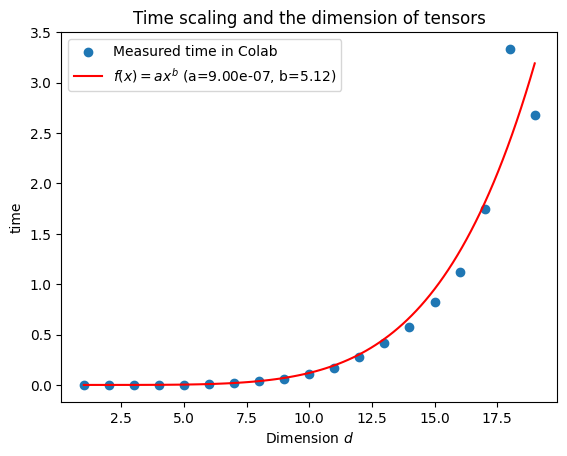

Fitted parameters: a = 8.999e-07, b = 5.1221


In [ ]:
# Assuming the scaling of the computational complexity
def func(x, a, b):
    return a * np.power(x, b)

# Fitting
params, _ = curve_fit(func, dim_list, time_list)
a, b = params

# Plotting
x_fit = np.linspace(1, max(dim_list), 100)
y_fit = func(x_fit, a, b)

plt.scatter(dim_list, time_list, label="Measured time in Colab")
plt.plot(x_fit, y_fit, color="red", label=f"$f(x) = ax^b$ (a={a:.2e}, b={b:.2f})")

plt.xlabel("Dimension $d$")
plt.ylabel("time")
plt.title("Time scaling and the dimension of tensors")
plt.legend()
plt.show()

print(f"Fitted parameters: a = {a:.3e}, b = {b:.4f}")

### Example - 2
$$ E_{ij} = \sum_{l,m,n=1}^{d} A_{il}B_{lm}C_{mn}D_{nj}. $$

Depending on each contraction scheme, the order scales as
- $\text{cost: }((A \times B) \times (C \times D)) = 3d^{3}$
- $\text{cost: }(((A \times B) \times C) \times D) = 3d^{3}$
- $\text{cost: }(A \times B \times C \times D) = d^{5}$

### Contraction

Broadly speaking, there are two approaches that could be taken to contract a network containing $N>2$ tensors:

1. A direct summation over all internal indices of the network in a single step.
2. A sequence of $(N-1)$ binary contractions.

In practice, we prefer the latter option, which is either computationally cheaper or an equivalent cost as the former option.

In [ ]:
## Example - 1
dim_list = np.arange(1, 15)
time_list1 = []
time_list2 = []
time_list3 = []


for dim in dim_list:
  A = np.random.rand(dim, dim)
  B = np.random.rand(dim, dim)
  C = np.random.rand(dim, dim)
  D = np.random.rand(dim, dim)
  E = np.zeros((dim, dim))

  ## Method 1 - (A@B)@(C@D)
  AB = np.zeros((dim, dim))
  CD = np.zeros((dim, dim))

  start = time.time()
  for i in range(dim):
    for m in range(dim):
      for l in range(dim):
        AB[i,m] += (A[i, l] * B[l, m])

  for m in range(dim):
    for j in range(dim):
      for n in range(dim):
        CD[m,j] += (C[m, n] * D[n, j])

  for i in range(dim):
    for j in range(dim):
      for m in range(dim):
        E[i,j] += AB[i,m]*CD[m,j]
  end = time.time()
  time_list1.append(end-start)

  ## Method 2 -(((A@B)@C)@D)
  AB = np.zeros((dim, dim))
  ABC = np.zeros((dim, dim))

  start = time.time()
  for i in range(dim):
    for m in range(dim):
      for l in range(dim):
        AB[i,j] += (A[i, l] * B[l, m])

  for i in range(dim):
    for n in range(dim):
      for m in range(dim):
        ABC[i,n] += (AB[i, m] * C[m, n])

  for i in range(dim):
    for j in range(dim):
      for n in range(dim):
        E[i,j] += ABC[i,n]*D[n,j]
  end = time.time()
  time_list2.append(end-start)

  ## Method 3 - AxBxCxD
  start = time.time()
  for i in range(dim):
    for j in range(dim):
      for l in range(dim):
        for m in range(dim):
          for n in range(dim):
            E[i,j] += A[i,m]*B[m,n]*C[n,l]*D[l,j]
  end = time.time()
  time_list3.append(end-start)

In [ ]:
# Assuming the scaling of the computational complexity
def func(x, a, b):
    return a * np.power(x, b)

# Fitting
params1, _ = curve_fit(func, dim_list, time_list1)
a1, b1 = params1
print(f"Fitted parameters: a1 = {a1:.3e}, b1 = {b1:.4f}")

params2, _ = curve_fit(func, dim_list, time_list2)
a2, b2 = params2
print(f"Fitted parameters: a2 = {a2:.3e}, b2 = {b2:.4f}")

params3, _ = curve_fit(func, dim_list, time_list3)
a3, b3 = params3
print(f"Fitted parameters: a3 = {a3:.3e}, b3 = {b3:.4f}")

x_fit = np.linspace(1, max(dim_list), 100)
y1_fit = func(x_fit, a1, b1)
y2_fit = func(x_fit, a2, b2)
y3_fit = func(x_fit, a3, b3)

Fitted parameters: a1 = 3.752e-06, b1 = 2.8680
Fitted parameters: a2 = 3.366e-06, b2 = 2.9291
Fitted parameters: a3 = 2.058e-06, b3 = 4.8623


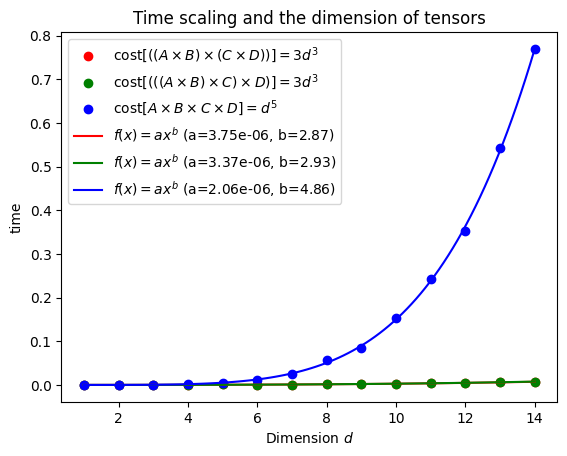

In [ ]:
# Plotting
plt.scatter(dim_list, time_list1, label=r"cost$[((A \times B) \times (C \times D))] = 3d^{3}$", color = "red")
plt.scatter(dim_list, time_list2, label=r"cost$[(((A \times B) \times C) \times D)] = 3d^{3}$", color = "green")
plt.scatter(dim_list, time_list3, label=r"cost$[A \times B \times C \times D] = d^{5}$", color = "blue")

plt.plot(x_fit, y1_fit, color="red", label=f"$f(x) = ax^b$ (a={a1:.2e}, b={b1:.2f})")
plt.plot(x_fit, y2_fit, color="green", label=f"$f(x) = ax^b$ (a={a2:.2e}, b={b2:.2f})")
plt.plot(x_fit, y3_fit, color="blue", label=f"$f(x) = ax^b$ (a={a3:.2e}, b={b3:.2f})")

plt.xlabel("Dimension $d$")
plt.ylabel("time")
plt.title("Time scaling and the dimension of tensors")
plt.legend(loc="upper left")
plt.show()

### Example - 3: Tensor networks and Loop

$$ D_{ijk} = \sum_{l=1}^{D} \sum_{m,n=1}^{d} A_{iln} B_{ljm} C_{nmk} $$
- Cost $A \times B \times C = d^{4} D^{2}$
- Cost $(A \times B) \times C = 2d^{4} D$
- Cost $(A \times C) \times B = 2d^{3} D^{2}$

In [ ]:
dim_list = np.arange(2, 10)
time_list1 = []
time_list2 = []
time_list3 = []

for idx in dim_list:
  d, D = idx, 20

  A = np.random.rand(d, D, d)
  B = np.random.rand(D, d, d)
  C = np.random.rand(d, d, D)

  E = np.zeros((d, d, D))
  AB = np.zeros((d, d, d, d))
  AC = np.zeros((d, D, d, D))

  ## Method - 1
  start = time.time()
  for i in range(d):
    for j in range(d):
      for k in range(D):
        for l in range(D):
          for m in range(d):
            for n in range(d):
              E[i, j, n] += A[i, l, n]*B[l, j, m]*C[n,m,k]
  end = time.time()
  time_list1.append(end-start)


  ## Method - 2
  start = time.time()
  for i in range(d):
    for j in range(d):
      for k in range(D):
        for l in range(D):
          AB[i,n,j,m] += A[i,l,n]*B[l,j,m]

  for i in range(d):
    for j in range(d):
      for k in range(D):
        for m in range(d):
          for n in range(d):
            E[i, j, k] += AB[i,n,j,m]*C[n, m, k]
  end = time.time()
  time_list2.append(end-start)

  ## Method - 3
  start = time.time()
  for i in range(d):
    for l in range(D):
      for n in range(d):
        for m in range(d):
          for k in range(D):
            AC[i, l, m, k] += A[i, l, n]*C[n, m, k]
  for i in range(d):
    for j in range(d):
      for k in range(D):
        for l in range(D):
          for m in range(d):
            E[i, j, k] += AC[i, l, m, k]*B[l, j, m]
  end = time.time()
  time_list3.append(end-start)

In [ ]:
# Assuming the scaling of the computational complexity
def func(x, a, b):
    return a * np.power(x, b)

# Fitting
params1, _ = curve_fit(func, dim_list, time_list1)
a1, b1 = params1
print(f"Fitted parameters: a1 = {a1:.3e}, b1 = {b1:.4f}")

params2, _ = curve_fit(func, dim_list, time_list2)
a2, b2 = params2
print(f"Fitted parameters: a2 = {a2:.3e}, b2 = {b2:.4f}")

params3, _ = curve_fit(func, dim_list, time_list3)
a3, b3 = params3
print(f"Fitted parameters: a3 = {a3:.3e}, b3 = {b3:.4f}")

x_fit = np.linspace(1, max(dim_list), 100)
y1_fit = func(x_fit, a1, b1)
y2_fit = func(x_fit, a2, b2)
y3_fit = func(x_fit, a3, b3)

Fitted parameters: a1 = 1.902e-03, b1 = 3.4941
Fitted parameters: a2 = 7.076e-05, b2 = 3.5782
Fitted parameters: a3 = 1.123e-03, b3 = 2.8830


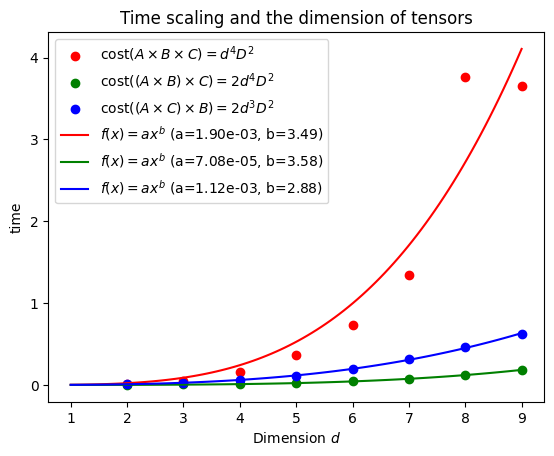

In [ ]:
# Plotting
plt.scatter(dim_list, time_list1, label=r"cost$(A \times B \times C) = d^{4}D^{2}$", color = "red")
plt.scatter(dim_list, time_list2, label=r"cost$((A \times B) \times C) = 2d^{4}D^{2}$", color = "green")
plt.scatter(dim_list, time_list3, label=r"cost$((A \times C) \times B) = 2d^{3}D^{2}$", color = "blue")

plt.plot(x_fit, y1_fit, color="red", label=f"$f(x) = ax^b$ (a={a1:.2e}, b={b1:.2f})")
plt.plot(x_fit, y2_fit, color="green", label=f"$f(x) = ax^b$ (a={a2:.2e}, b={b2:.2f})")
plt.plot(x_fit, y3_fit, color="blue", label=f"$f(x) = ax^b$ (a={a3:.2e}, b={b3:.2f})")

plt.xlabel("Dimension $d$")
plt.ylabel("time")
plt.title("Time scaling and the dimension of tensors")
plt.legend(loc="upper left")
plt.show()

# T1.5: Contraction of tensor networs

Given a tensor network composed of $N$ tensors, there are two distinct steps needed to contract the network efficiently:

1. Determine the optimal sequence of the $(N-1)$ binary tensor contractions,
2. Evaluate each of **the binary contractions** in turn as a matrix multiplication by taking the proper tensor **permutes** and **reshapes**.

### Remarks: determining the optimal contraction sequence
- When we refer to the ‘**optimal**’ sequence of contraction, there are usually two criteria.
  1. Minimizes the number of scalar multiplications
  2. Minimize the size of intermediate tensors used in the contraction (if the calculation was memory limited).
  - Often, though not always, these two criteria will coincide.

- While if a given tensor network is small it is often easy to find the optimal sequence ‘manually’ through inspection of the network, For more complicated networks with a large number of tensors, it may be necessary to employ an automated search algorithm.
  - [*Robert N. C. Pfeifer, Jutho Haegeman, Frank Verstraete*, Faster identification of optimal contraction sequences for tensor networks](https://arxiv.org/abs/1304.6112)
  - [*Robert N. C. Pfeifer, Glen Evenbly, Sukhwinder Singh, Guifre Vidal*, NCON: A tensor network contractor for MATLAB](https://arxiv.org/abs/1402.0939)



Once the optimal contraction sequence has been determined, a network can be evaluated by implementing each of the binary contractions in turn.

- However, using ‘**reshape**’ and ‘**permute**’ commands for each binary tensor contraction, *although computationally effective*, has two significant drawbacks:
  1. it results in lengthy code that is error prone and difficult to check.
  2. it does not allow for the contraction sequence to be easily changed (network dependent contraction)
    - The entire code for the contraction would commonly need to be rewritten to accommodate a different ordering.


## **Network contractor - *ncon(⋅, ⋅, ⋅)***

The **ncon** function is a useful tool to lessen the programming effort required to implement a tensor network contraction.
- The **ncon** function works by automatically performing a desired sequence of **permutes**, **reshapes** and **matrix multiplications** required to evaluate a tensor network.
- The **ncon** code and detailed instructions for its usage can be found below.
  - [*Robert N. C. Pfeifer, Glen Evenbly, Sukhwinder Singh, Guifre Vidal*, NCON: A tensor network contractor for MATLAB](https://arxiv.org/abs/1402.0939)
  - [**NCON** code](https://www.tensors.net/code)


### How to use **ncon**
The first step in using ‘ncon’ to evaluate a network is to make a labelled diagram of the network such that:

- Each internal index is labelled with a unique positive integer.
  - Typically, sequential integers starts from 1, although this is not necessary
- External indices of the diagram (if there are any) are labelled with sequential negative integers $[-1,-2,-3,…]$ which denote the desired index order on the final tensor (with -1 as the first index, -2 as the second etc).

Following this, the ‘ncon’ routine is called as follows,
$$ \text{OutputTensor = ncon(TensorArray, IndexArray, ContOrder)}, $$
with input arguments defined:
- **TensorArray**:
  - 1D cell array containing the tensors comprising the network
- **IndexArray**:
  - 1D cell array of vectors, where the kth element is a vector of the integer labels from the diagram on the kth tensor from ‘TensorArray’ (ordered following the corresponding index order on this tensor).
- **ContOrder**:
  - a vector containing the positive integer labels from the diagram, used to specify order in which ‘ncon’ contracts the indices.
  - Note that ‘ContOrder’ is an optional input that can be omitted if desired, in which case ‘ncon’ will contract in ascending order of index labels.

### Example - 1
![center |Fig_1_1_a.webp](https://drive.google.com/uc?export=view&id=18-drJugwm-nlpUyIDUXCs2kq6vmjYUWw)


In [ ]:
d = 10;
A = np.random.rand(d,d,d)
B = np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d)
D = np.random.rand(d,d)

CD = np.zeros((d, d, d))
CDB = np.zeros((d, d, d))
E = np.zeros((d, d))

In [ ]:
# ncon network contractor
# by Glen Evenbly (c) for www.tensors.net, (v1.2) - last modified 6/2020

# ncon.py
import numpy as np
from typing import List, Union, Tuple, Optional


def ncon(tensors: List[np.ndarray],
         connects: List[Union[List[int], Tuple[int]]],
         con_order: Optional[Union[List[int], str]] = None,
         check_network: Optional[bool] = True,
         which_env: Optional[int] = 0):
  """
  Network CONtractor: contracts a tensor network of N tensors via a sequence
  of (N-1) tensordot operations. More detailed instructions and examples can
  be found at: https://arxiv.org/abs/1402.0939.
  Args:
    tensors: list of the tensors in the network.
    connects: length-N list of lists (or tuples) specifying the network
      connections. The jth entry of the ith list in connects labels the edge
      connected to the jth index of the ith tensor. Labels should be positive
      integers for internal indices and negative integers for free indices.
    con_order: optional argument to specify the order for contracting the
      positive indices. Defaults to ascending order if omitted. Can also be
      set at "greedy" or "full" to call a solver to automatically determine
      the order.
    check_network: if true then the input network is checked for consistency;
      this can catch many common user mistakes for defining networks.
    which_env: if provided, ncon will produce the environment of the requested
      tensor (i.e. the network given by removing the specified tensor from
      the original network). Only valid for networks with no open indices.
  Returns:
    Union[np.ndarray,float]: the result of the network contraction; an
      np.ndarray if the network contained open indices, otherwise a scalar.
  """
  num_tensors = len(tensors)
  tensor_list = [tensors[ele] for ele in range(num_tensors)]
  connect_list = [np.array(connects[ele]) for ele in range(num_tensors)]

  # generate contraction order if necessary
  flat_connect = np.concatenate(connect_list)
  if con_order is None:
    con_order = np.unique(flat_connect[flat_connect > 0])
  else:
    con_order = np.array(con_order)

  # check inputs if enabled
  if check_network:
    dims_list = [list(tensor.shape) for tensor in tensor_list]
    check_inputs(connect_list, flat_connect, dims_list, con_order)

  # do all partial traces
  for ele in range(len(tensor_list)):
    num_cont = len(connect_list[ele]) - len(np.unique(connect_list[ele]))
    if num_cont > 0:
      tensor_list[ele], connect_list[ele], cont_ind = partial_trace(
          tensor_list[ele], connect_list[ele])
      con_order = np.delete(
          con_order,
          np.intersect1d(con_order, cont_ind, return_indices=True)[1])

  # do all binary contractions
  while len(con_order) > 0:
    # identify tensors to be contracted
    cont_ind = con_order[0]
    locs = [
        ele for ele in range(len(connect_list))
        if sum(connect_list[ele] == cont_ind) > 0
    ]

    # do binary contraction
    cont_many, A_cont, B_cont = np.intersect1d(
        connect_list[locs[0]],
        connect_list[locs[1]],
        assume_unique=True,
        return_indices=True)
    if np.size(tensor_list[locs[0]]) < np.size(tensor_list[locs[1]]):
      ind_order = np.argsort(A_cont)
    else:
      ind_order = np.argsort(B_cont)

    tensor_list.append(
        np.tensordot(
            tensor_list[locs[0]],
            tensor_list[locs[1]],
            axes=(A_cont[ind_order], B_cont[ind_order])))
    connect_list.append(
        np.append(
            np.delete(connect_list[locs[0]], A_cont),
            np.delete(connect_list[locs[1]], B_cont)))

    # remove contracted tensors from list and update con_order
    del tensor_list[locs[1]]
    del tensor_list[locs[0]]
    del connect_list[locs[1]]
    del connect_list[locs[0]]
    con_order = np.delete(
        con_order,
        np.intersect1d(con_order, cont_many, return_indices=True)[1])

  # do all outer products
  while len(tensor_list) > 1:
    s1 = tensor_list[-2].shape
    s2 = tensor_list[-1].shape
    tensor_list[-2] = np.outer(tensor_list[-2].reshape(np.prod(s1)),
                               tensor_list[-1].reshape(np.prod(s2))).reshape(
                                   np.append(s1, s2))
    connect_list[-2] = np.append(connect_list[-2], connect_list[-1])
    del tensor_list[-1]
    del connect_list[-1]

  # do final permutation
  if len(connect_list[0]) > 0:
    return np.transpose(tensor_list[0], np.argsort(-connect_list[0]))
  else:
    return tensor_list[0].item()


def partial_trace(A, A_label):
  """ Partial trace on tensor A over repeated labels in A_label """

  num_cont = len(A_label) - len(np.unique(A_label))
  if num_cont > 0:
    dup_list = []
    for ele in np.unique(A_label):
      if sum(A_label == ele) > 1:
        dup_list.append([np.where(A_label == ele)[0]])

    cont_ind = np.array(dup_list).reshape(2 * num_cont, order='F')
    free_ind = np.delete(np.arange(len(A_label)), cont_ind)

    cont_dim = np.prod(np.array(A.shape)[cont_ind[:num_cont]])
    free_dim = np.array(A.shape)[free_ind]

    B_label = np.delete(A_label, cont_ind)
    cont_label = np.unique(A_label[cont_ind])
    B = np.zeros(np.prod(free_dim))
    A = A.transpose(np.append(free_ind, cont_ind)).reshape(
        np.prod(free_dim), cont_dim, cont_dim)
    for ip in range(cont_dim):
      B = B + A[:, ip, ip]

    return B.reshape(free_dim), B_label, cont_label

  else:
    return A, A_label, []


def check_inputs(connect_list, flat_connect, dims_list, con_order):
  """ Check consistancy of NCON inputs"""

  pos_ind = flat_connect[flat_connect > 0]
  neg_ind = flat_connect[flat_connect < 0]

  # check that lengths of lists match
  if len(dims_list) != len(connect_list):
    raise ValueError(
        ('mismatch between %i tensors given but %i index sublists given') %
        (len(dims_list), len(connect_list)))

  # check that tensors have the right number of indices
  for ele in range(len(dims_list)):
    if len(dims_list[ele]) != len(connect_list[ele]):
      raise ValueError((
          'number of indices does not match number of labels on tensor %i: '
          '%i-indices versus %i-labels')
          % (ele, len(dims_list[ele]), len(connect_list[ele])))

  # check that contraction order is valid
  if not np.array_equal(np.sort(con_order), np.unique(pos_ind)):
    raise ValueError(('NCON error: invalid contraction order'))

  # check that negative indices are valid
  for ind in np.arange(-1, -len(neg_ind) - 1, -1):
    if sum(neg_ind == ind) == 0:
      raise ValueError(('NCON error: no index labelled %i') % (ind))
    elif sum(neg_ind == ind) > 1:
      raise ValueError(('NCON error: more than one index labelled %i') % (ind))

  # check that positive indices are valid and contracted tensor dimensions match
  flat_dims = np.array([item for sublist in dims_list for item in sublist])
  for ind in np.unique(pos_ind):
    if sum(pos_ind == ind) == 1:
      raise ValueError(('NCON error: only one index labelled %i') % (ind))
    elif sum(pos_ind == ind) > 2:
      raise ValueError(
          ('NCON error: more than two indices labelled %i') % (ind))

    cont_dims = flat_dims[flat_connect == ind]
    if cont_dims[0] != cont_dims[1]:
      raise ValueError(
          ('NCON error: tensor dimension mismatch on index labelled %i: '
           'dim-%i versus dim-%i') % (ind, cont_dims[0], cont_dims[1]))

  return True

In [ ]:
d = 10
A = np.random.rand(d,d,d); B = np.random.rand(d,d,d,d)
C = np.random.rand(d,d,d); D = np.random.rand(d,d)

TensorArray = [A,B,C,D]
IndexArray = [[1,-2,2],[-1,1,3,4],[5,3,2],[4,5]]

E = ncon(TensorArray, IndexArray, con_order = [5,3,4,1,2])

In [ ]:
%%%%% Ex.1.5(c): Partial trace
d = 10;
A = rand(d,d,d,d,d,d);

B = ncon({A},{[-1,-2,1,-3,-4,1]});

array([[6355.91893784, 6402.87623539, 6545.48003655, 6321.58265069,
        6399.06608153, 7122.56029247, 6116.49730087, 6472.40108301,
        6551.68734858, 6496.97176435],
       [6428.90094279, 6535.35196437, 6643.20461177, 6455.06659758,
        6511.17401486, 7273.56271007, 6234.41151559, 6560.18313783,
        6657.67622218, 6608.63838545],
       [6670.28106663, 6741.71087137, 6864.29261862, 6683.98782341,
        6699.90707249, 7468.39558488, 6484.09823876, 6764.36345146,
        6925.67644662, 6809.42453118],
       [6444.05448058, 6565.59451307, 6642.40657874, 6511.82840088,
        6518.81853801, 7314.54731875, 6282.36159217, 6605.64488677,
        6665.89518899, 6638.10075662],
       [6396.07654626, 6484.55394767, 6558.88941779, 6414.74204339,
        6440.03936976, 7208.75614768, 6211.1796866 , 6530.92021188,
        6587.17730331, 6561.90975631],
       [6503.29966976, 6600.61379459, 6664.30390201, 6482.88030512,
        6564.81989478, 7342.36041183, 6255.56773583, 6632